In [10]:
import numpy as np
import anndata
import os
import sys
import scipy
import re
import matplotlib.pyplot as plt


In [3]:
adata = anndata.read_h5ad("../../../../../pipeline42/datasets/TabulaSapiens/normalized/TS_Liver.h5ad")

In [9]:
np.max(adata.layers['depth_normalized'])

0.014767967859479324

(array([[5.007e+03, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        [5.002e+03, 5.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        [5.007e+03, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        ...,
        [4.951e+03, 5.200e+01, 3.000e+00, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        [4.998e+03, 7.000e+00, 1.000e+00, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        [5.003e+03, 4.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
         0.000e+00]]),
 array([0.        , 0.0014768 , 0.00295359, 0.00443039, 0.00590719,
        0.00738398, 0.00886078, 0.01033758, 0.01181437, 0.01329117,
        0.01476797]),
 <a list of 58870 BarContainer objects>)

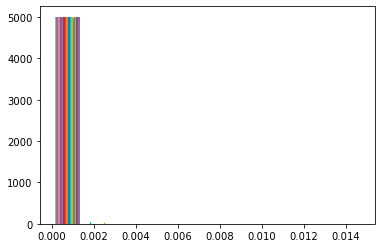

In [13]:
plt.hist(adata.layers['depth_normalized'].toarray())

In [6]:
np.array(adata.var['gene_symbol'])

array(['DDX11L1', 'WASH7P', 'MIR6859-1', ..., 'MT-CYB', 'MT-TT', 'MT-TP'],
      dtype=object)

In [7]:
adata.obs

,organ_tissue,method,donor,anatomical_information,n_counts_UMIs,n_genes,cell_ontology_class,free_annotation,manually_annotated,compartment,gender,X_counts_UMIs
cell_id,,,,,,,,,,,,
AAACCCACACTCCTGT_TSP6_Liver_NA_10X_1_1,Liver,10X,TSP6,nan,7633.0,2259,macrophage,Monocyte/Macrophage,True,immune,male,5628.679688
AAACGAAGTACCAGAG_TSP6_Liver_NA_10X_1_1,Liver,10X,TSP6,nan,2858.0,1152,monocyte,Monocyte,True,immune,male,4306.858887
AAACGCTCAACGGCTC_TSP6_Liver_NA_10X_1_1,Liver,10X,TSP6,nan,7787.0,2983,endothelial cell of hepatic sinusoid,Endothelial,True,endothelial,male,8759.871094
AAAGAACAGCCTCTTC_TSP6_Liver_NA_10X_1_1,Liver,10X,TSP6,nan,10395.0,2598,macrophage,Monocyte/Macrophage,True,immune,male,5900.878906
AAAGAACGTAGCACAG_TSP6_Liver_NA_10X_1_1,Liver,10X,TSP6,nan,6610.0,2125,liver dendritic cell,Dendritic cell,True,immune,male,5663.609863
...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGATCCATCGGCCA_TSP14_Liver_NA_10X_2_1,Liver,10X,TSP14,nan,32707.0,4815,hepatocyte,Hepatocyte,True,epithelial,male,8503.800781
TTTGGAGTCAGTCTTT_TSP14_Liver_NA_10X_2_1,Liver,10X,TSP14,nan,19864.0,3526,hepatocyte,Hepatocyte,True,epithelial,male,7734.766113
TTTGGTTGTCACTCGG_TSP14_Liver_NA_10X_2_1,Liver,10X,TSP14,nan,2550.0,1389,endothelial cell of hepatic sinusoid,Endothelial,True,endothelial,male,6465.483398
